### 📈 Race Pace Overview

This section analyzes driver performance by converting lap times into seconds and calculating statistics like mean, median, and best laps.  
It helps identify who had the most consistent pace and who delivered standout laps during the race.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.plotting import TEAM_COLORS
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import matplotlib as mpl
from typing import Union
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/__init__.py:84: FutureWarning: INCOMPATIBLE with 2025 season! TEAM_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"INCOMPATIBLE with 2025 season! {name} is deprecated "


In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Barcellona Grand Prix', 'R')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (6.18 GB) /Users/PietroPaolo/Library/Caches/fastf1
events      WARNING 	Correcting user input 'Barcellona Grand Prix' to 'Spanish Grand Prix'
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 dr

In [3]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 01:01:57.427000,VER,1,0 days 00:01:20.083000,2.0,1.0,NaT,NaT,0 days 00:00:24.125000,0 days 00:00:32.278000,...,False,Red Bull Racing,0 days 01:00:37.344000,2025-06-01 13:04:41.542,1,2.0,False,,False,True
2,0 days 01:03:17.964000,VER,1,0 days 00:01:20.537000,3.0,1.0,NaT,NaT,0 days 00:00:23.816000,0 days 00:00:32.561000,...,False,Red Bull Racing,0 days 01:01:57.427000,2025-06-01 13:06:01.625,1,2.0,False,,False,True
3,0 days 01:04:38.996000,VER,1,0 days 00:01:21.032000,4.0,1.0,NaT,NaT,0 days 00:00:24.299000,0 days 00:00:32.612000,...,False,Red Bull Racing,0 days 01:03:17.964000,2025-06-01 13:07:22.162,1,2.0,False,,False,True
4,0 days 01:05:59.960000,VER,1,0 days 00:01:20.964000,5.0,1.0,NaT,NaT,0 days 00:00:24.223000,0 days 00:00:32.561000,...,False,Red Bull Racing,0 days 01:04:38.996000,2025-06-01 13:08:43.194,1,2.0,False,,False,True
5,0 days 01:07:20.782000,VER,1,0 days 00:01:20.822000,6.0,1.0,NaT,NaT,0 days 00:00:23.966000,0 days 00:00:32.687000,...,False,Red Bull Racing,0 days 01:05:59.960000,2025-06-01 13:10:04.158,1,2.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,0 days 02:27:19.124000,BEA,87,0 days 00:01:20.255000,62.0,4.0,NaT,NaT,0 days 00:00:23.593000,0 days 00:00:32.490000,...,False,Haas F1 Team,0 days 02:25:58.869000,2025-06-01 14:30:03.067,1,14.0,False,,False,True
1199,0 days 02:28:38.031000,BEA,87,0 days 00:01:18.907000,63.0,4.0,NaT,NaT,0 days 00:00:22.884000,0 days 00:00:32.034000,...,False,Haas F1 Team,0 days 02:27:19.124000,2025-06-01 14:31:23.322,1,13.0,False,,False,True
1200,0 days 02:29:58.331000,BEA,87,0 days 00:01:20.300000,64.0,4.0,NaT,NaT,0 days 00:00:23.498000,0 days 00:00:32.736000,...,False,Haas F1 Team,0 days 02:28:38.031000,2025-06-01 14:32:42.229,1,13.0,False,,False,True
1201,0 days 02:31:18.413000,BEA,87,0 days 00:01:20.082000,65.0,4.0,NaT,NaT,0 days 00:00:23.363000,0 days 00:00:32.711000,...,False,Haas F1 Team,0 days 02:29:58.331000,2025-06-01 14:34:02.529,1,13.0,False,,False,True


In [4]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.

    Parameters:
    - td: pd.Timedelta

    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    # Clean up team names by stripping extra spaces
    team = team.strip()

    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            # Use the internal TEAM_COLORS dictionary for the team color
            return TEAM_COLORS[team.lower()]  # Ensure team name matches the expected format
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

# Create the palette, ensuring teams are processed correctly
team_palette = {team: get_team_color(team) for team in team_order}

In [7]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "COL": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [8]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

### 🏁 Team Performance Comparison

Teams are ranked by their median lap time across the race.  
This gives a high-level overview of overall race competitiveness, showing which teams delivered strong race setups and consistent execution.

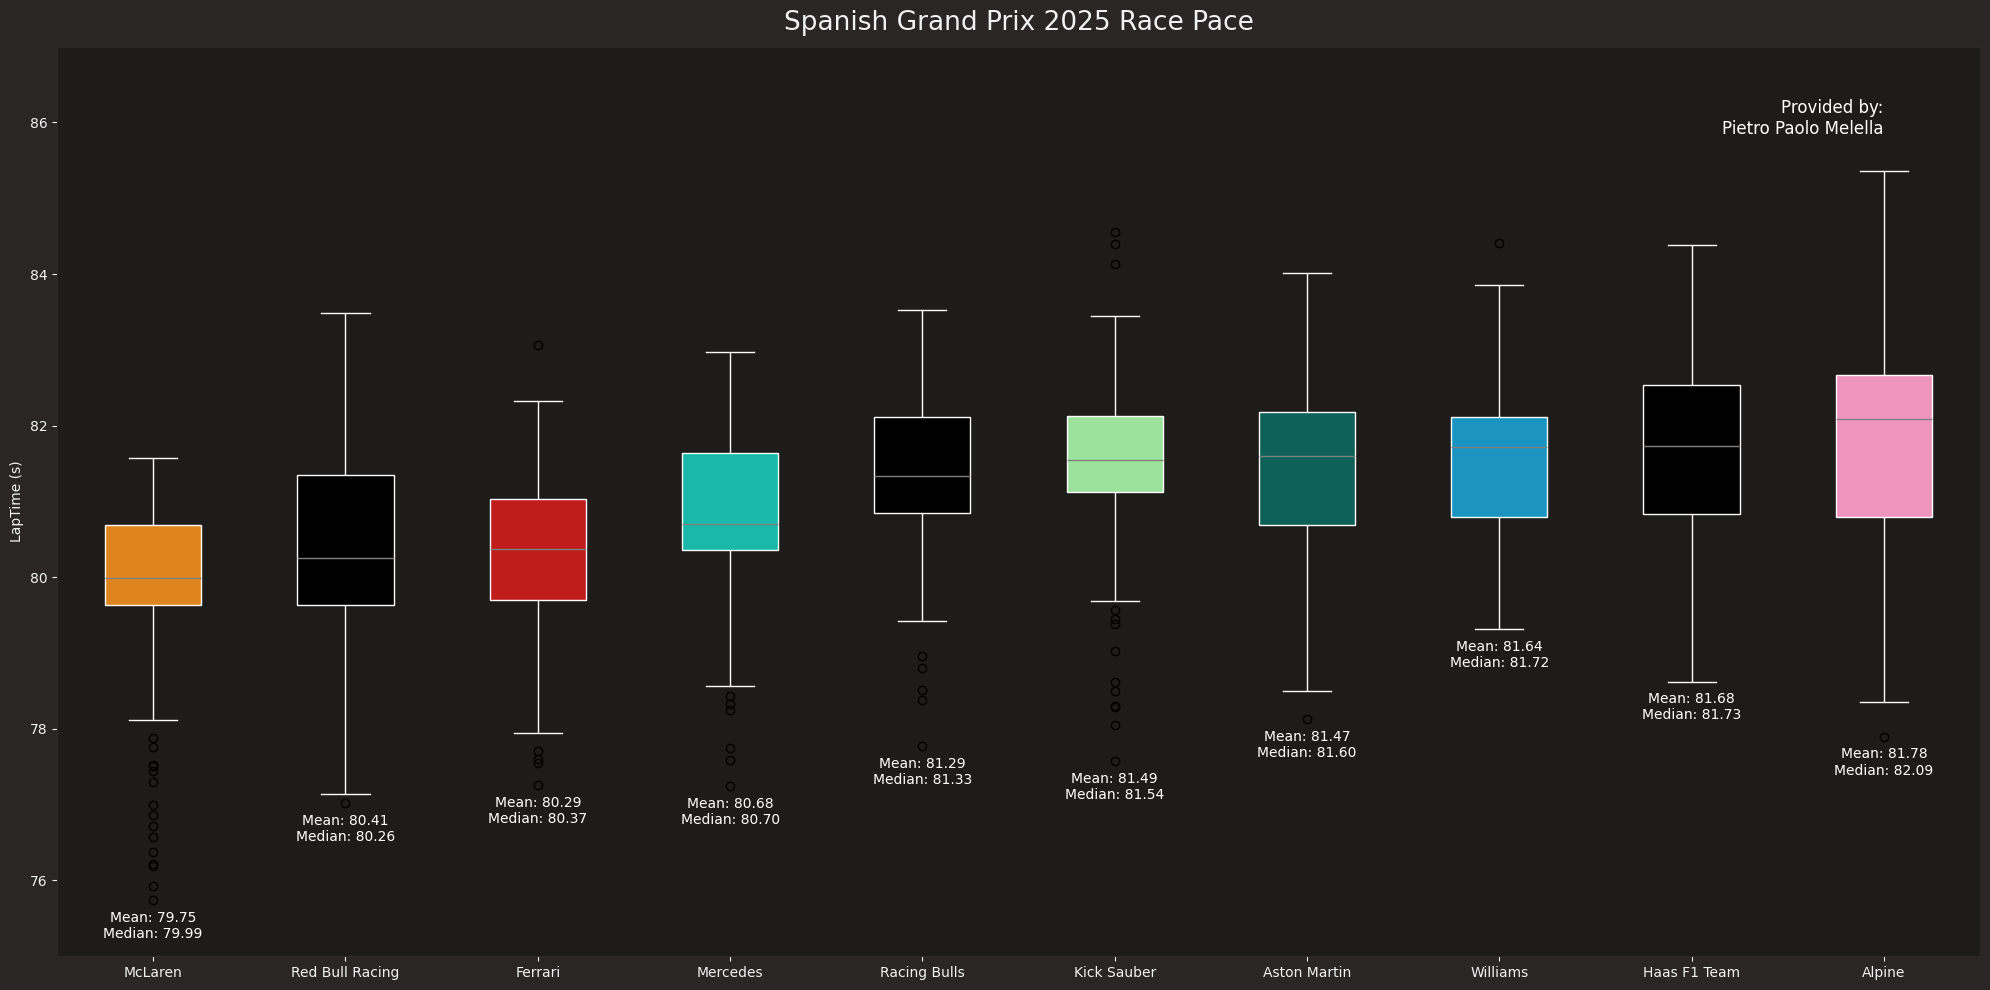

In [9]:
# First, calculate the mean and median times for each team
transformed_laps.reset_index(drop=True, inplace=True)

team_stats = transformed_laps.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(75, 87)  # Example range, adjust based on your data

# Loop through the teams and add mean and median text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

# Update plot title and remove grid
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace")
plt.grid(visible=False)

# Add source text in a more readable position
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Remove redundant x-label
ax.set(xlabel=None)

# Tight layout and display
plt.tight_layout()
plt.show()

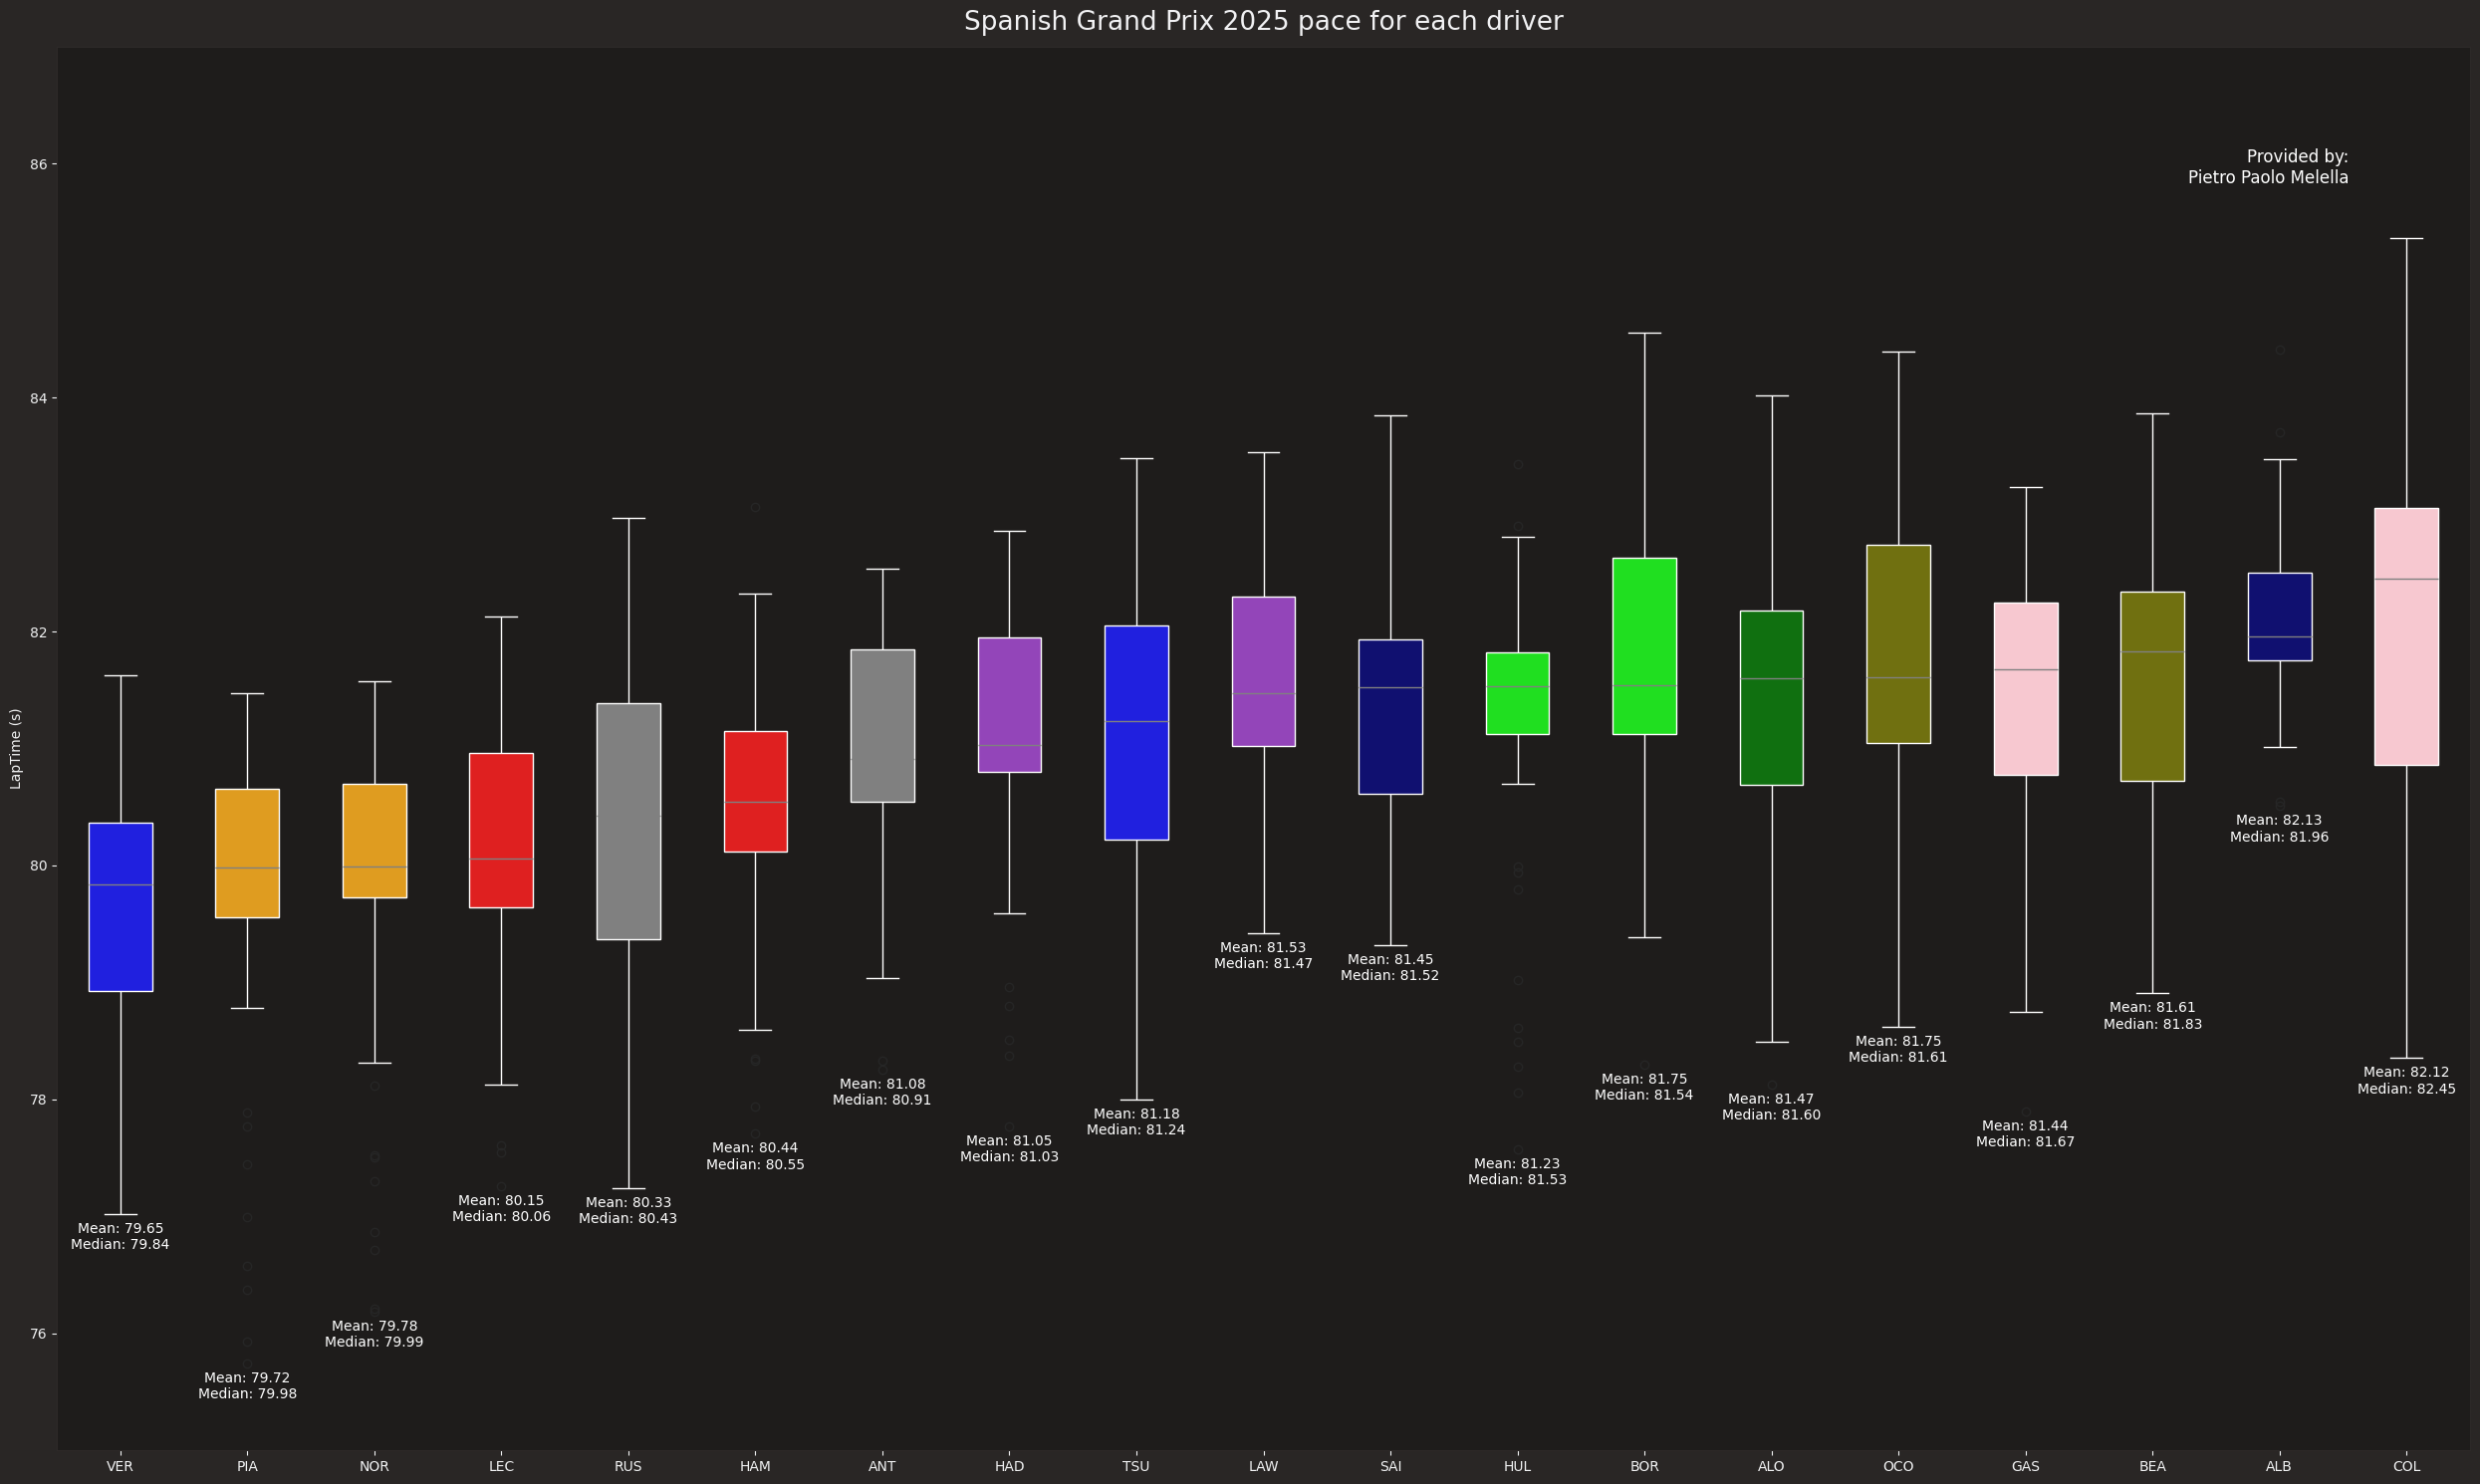

In [10]:
drivers_stats = transformed_laps.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)


# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.3,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )


plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver")
plt.grid(visible=False)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(75,87)  # Example range, adjust based on your data
# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

### 🏎️ Driver Pace by Stint

This script creates boxplots of lap times per driver for a given stint, sorted by median lap time.  
Under each lower whisker, it annotates the driver’s mean and median lap times for quick comparison.  

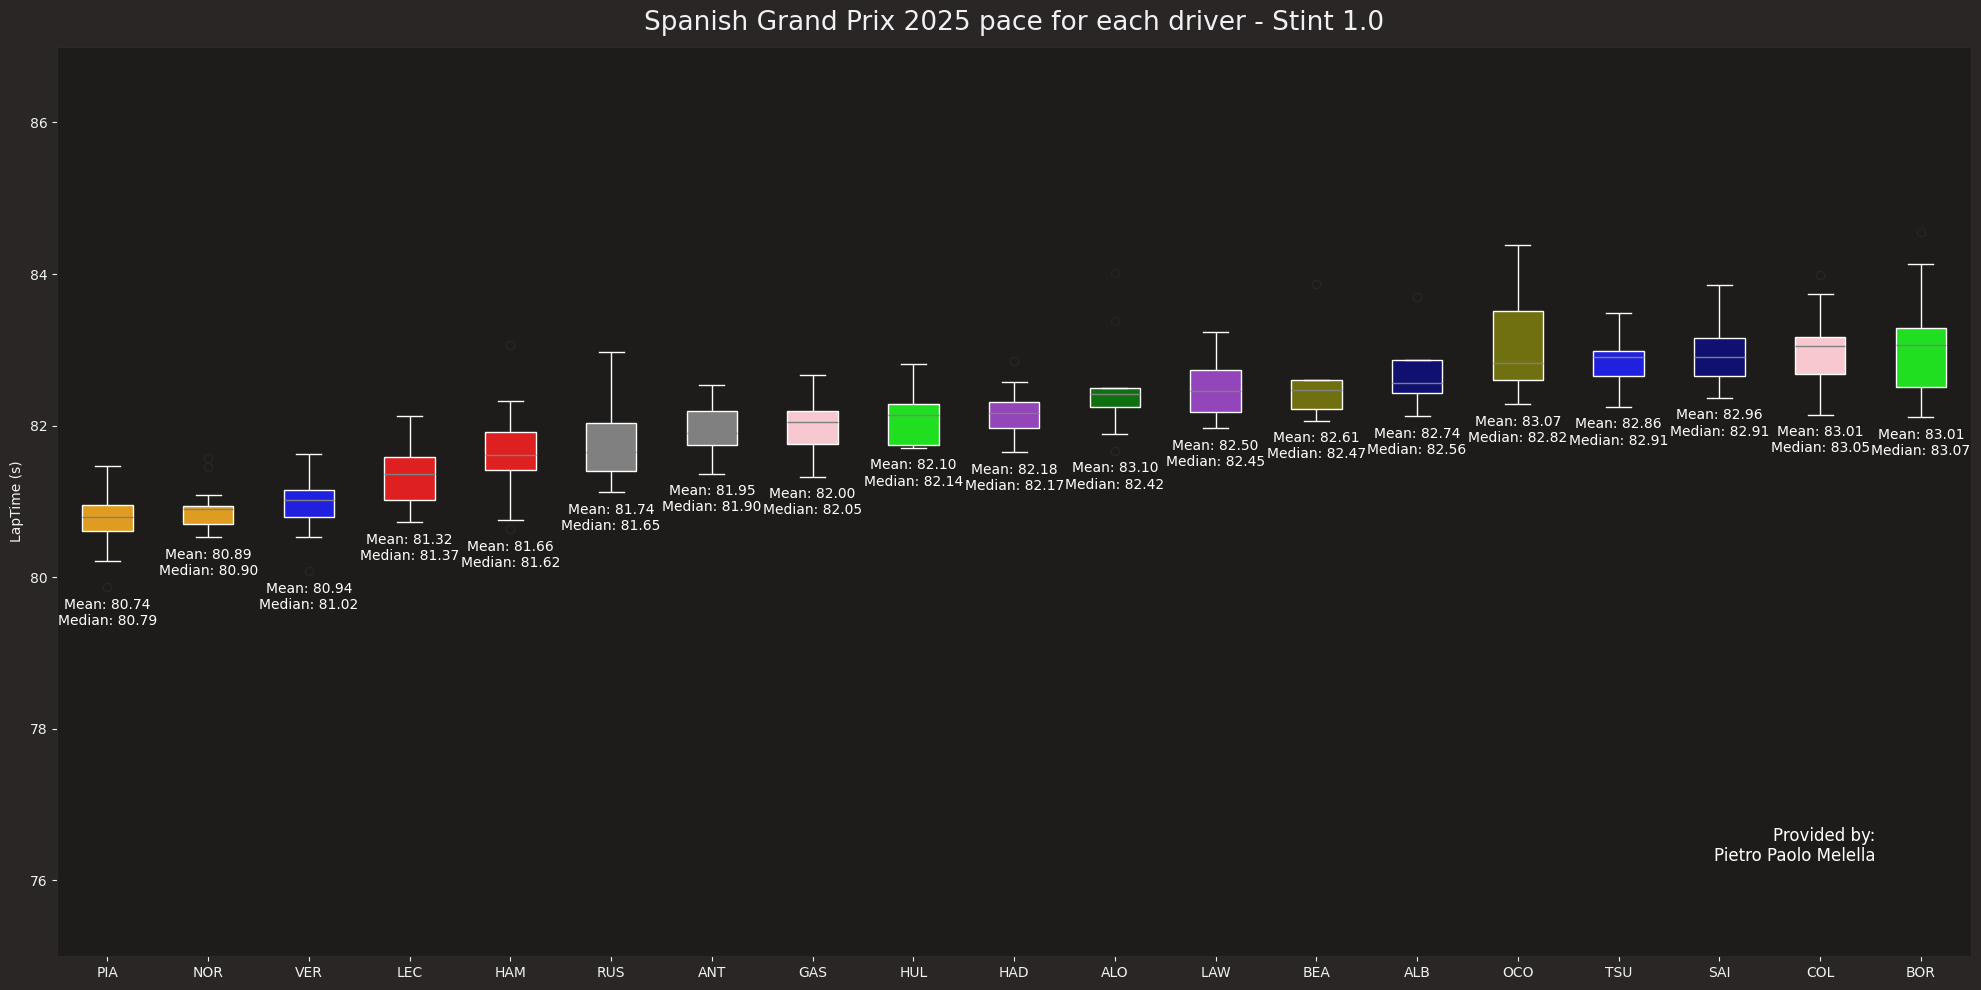

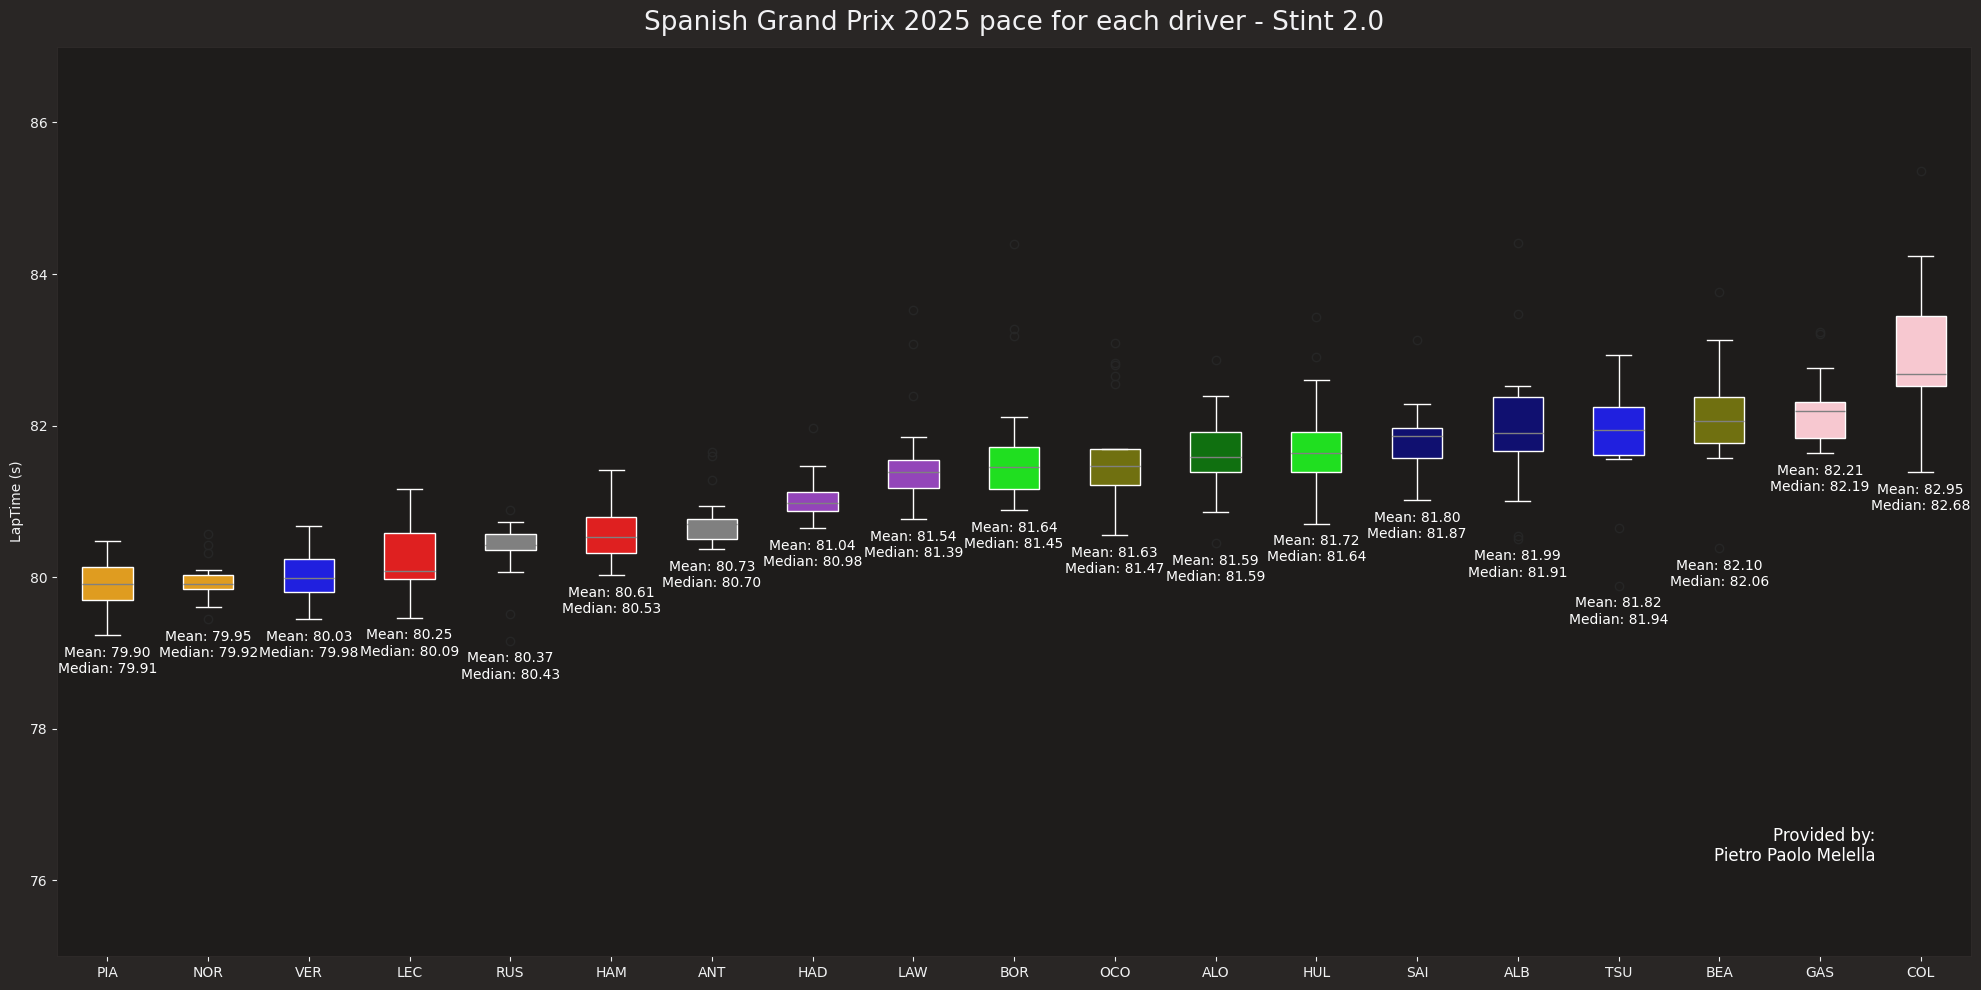

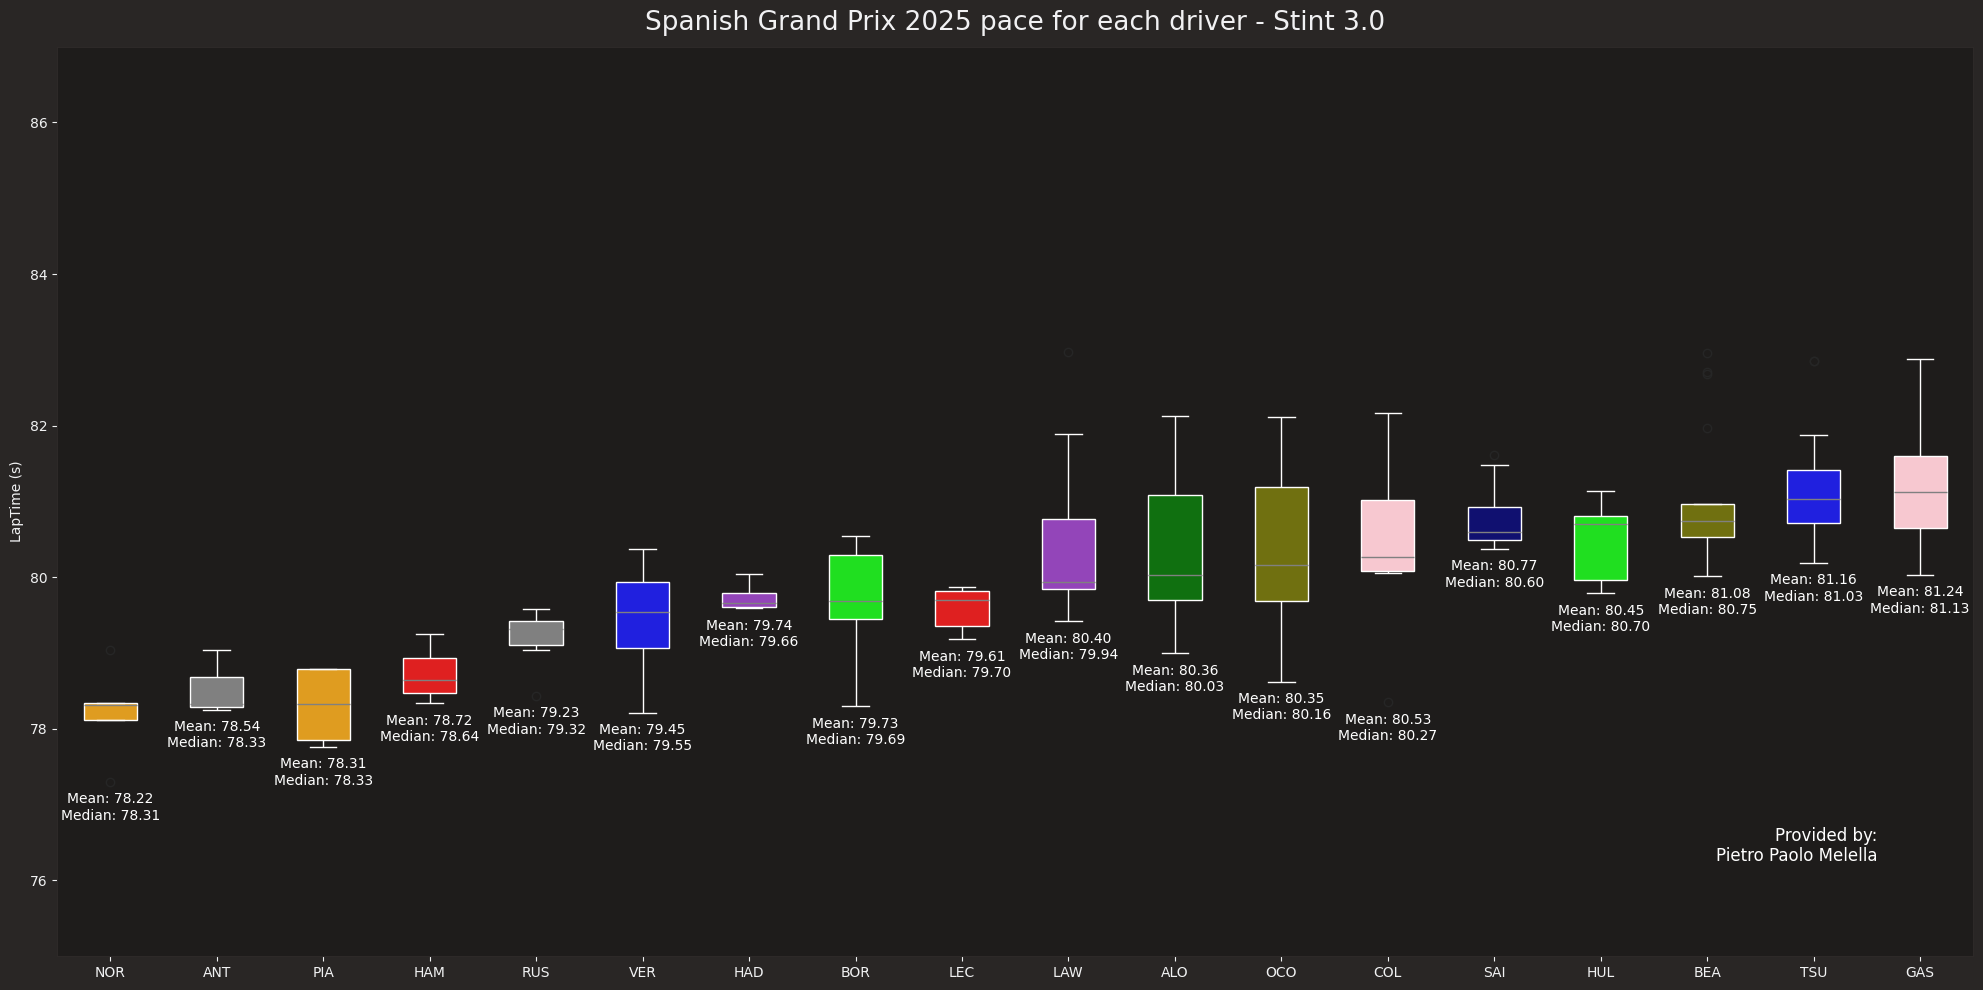

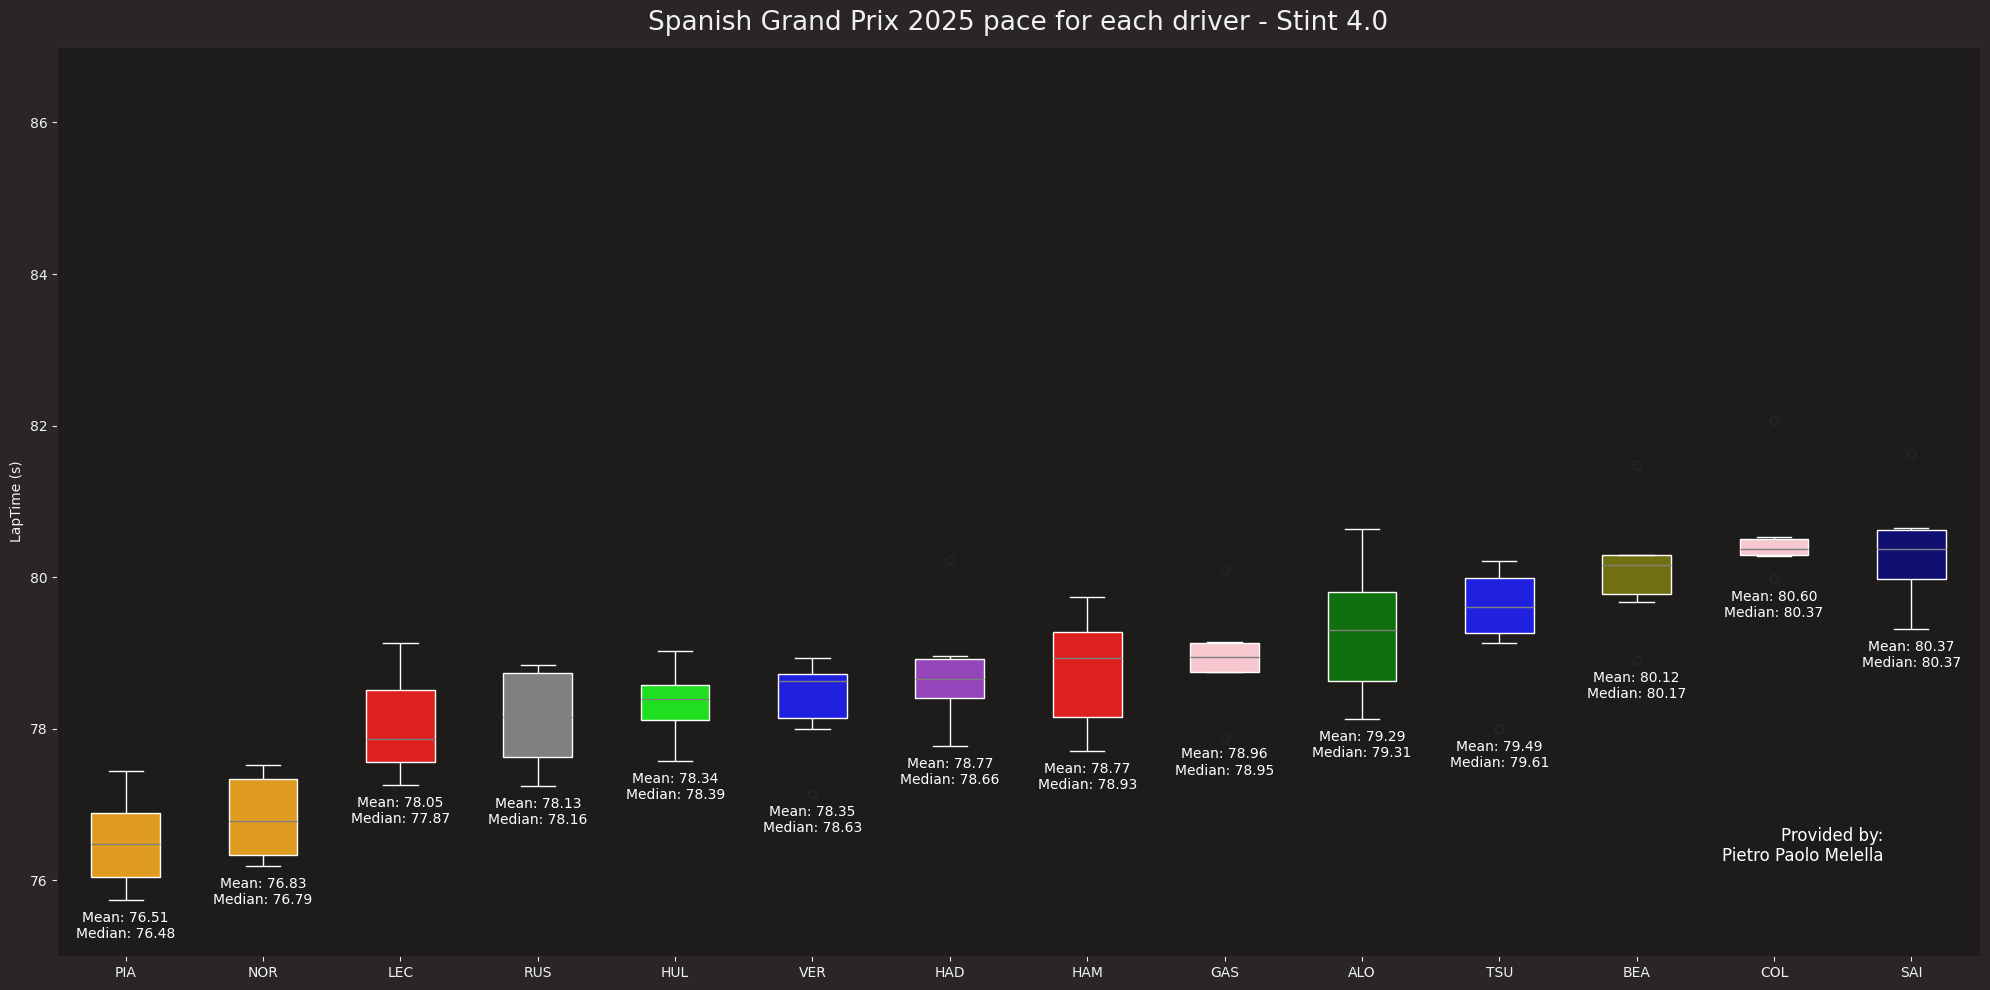

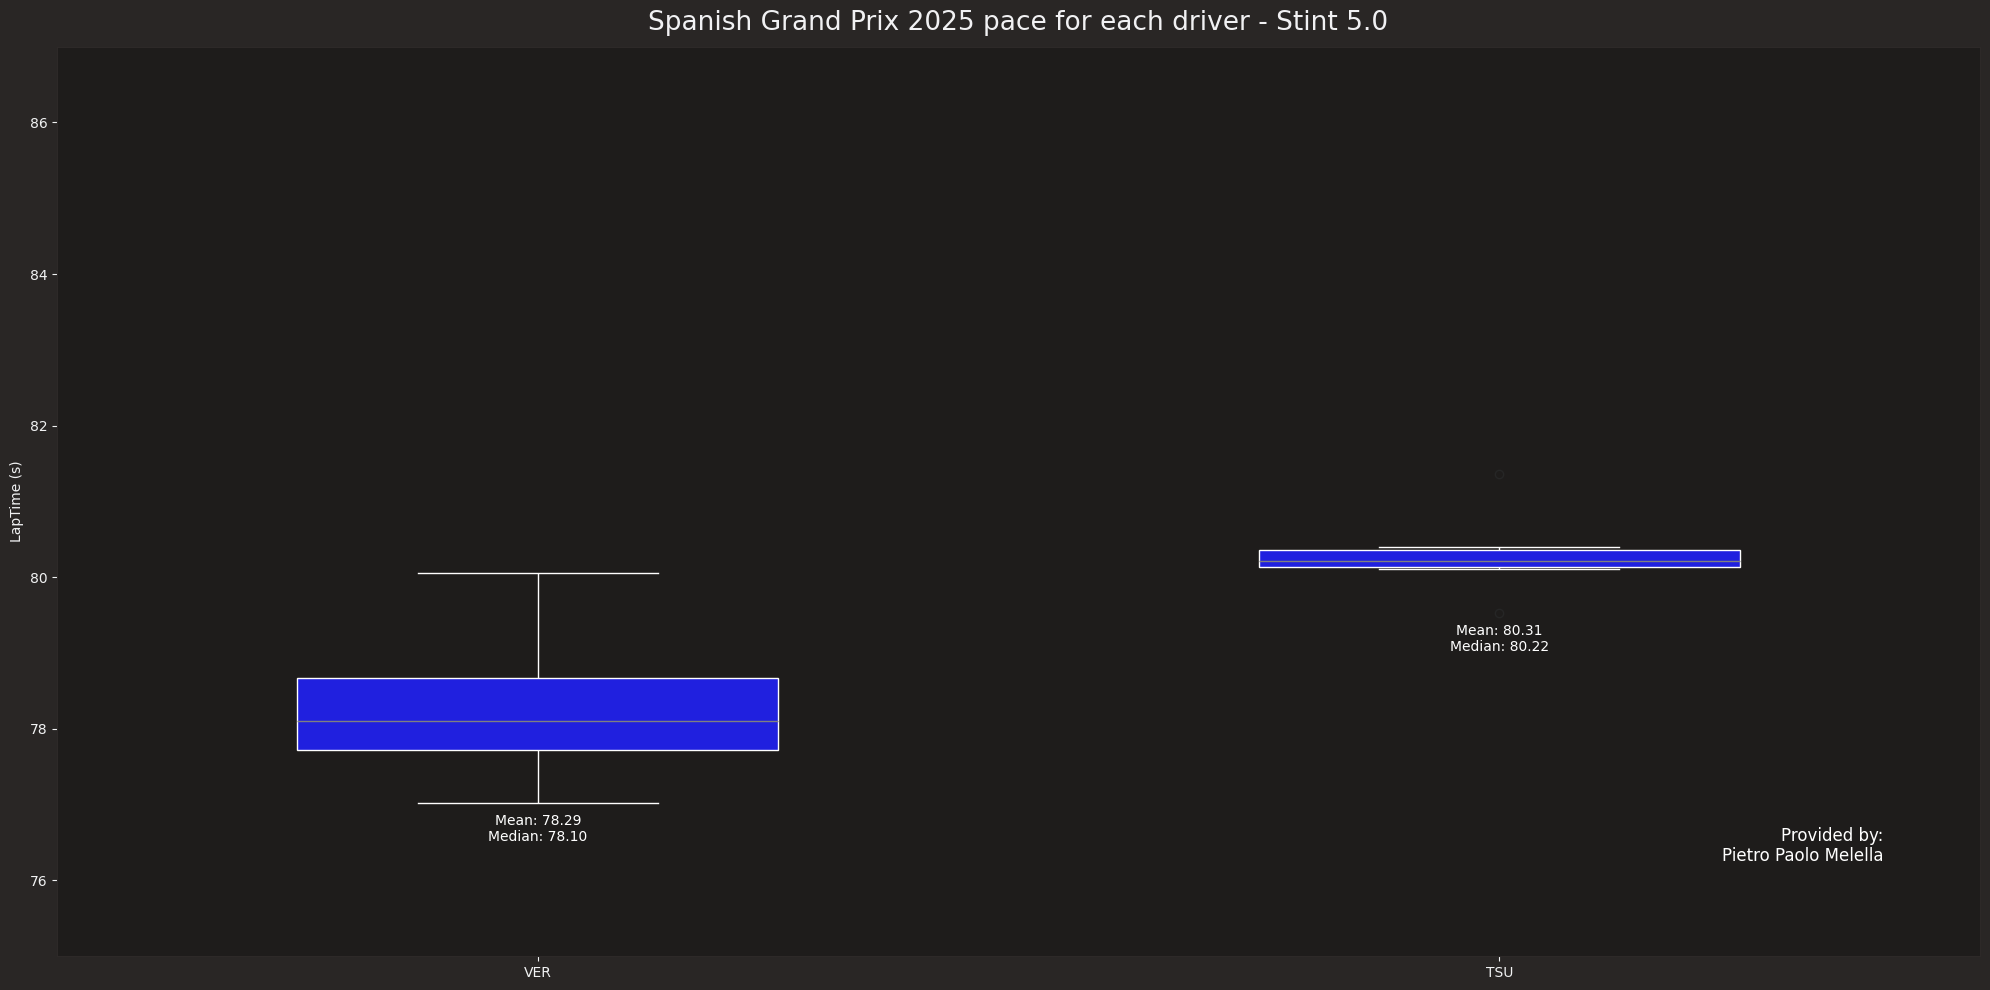

In [11]:
def plot_lap_times_for_stint_with_driver_stats(stint, transformed_laps, colors):
    # 1) Filter for the specific stint
    laps_with_stint = transformed_laps[transformed_laps['Stint'] == stint].copy()
    laps_with_stint.reset_index(drop=True, inplace=True)

    # 2) Compute median lap time per driver, then sort drivers by that median
    median_lap_times = laps_with_stint.groupby('Driver')['LapTime (s)'].median()
    sorted_drivers = median_lap_times.sort_values().index

    # 3) Create the boxplot
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.boxplot(
        data=laps_with_stint,
        x="Driver",
        y="LapTime (s)",
        hue="Driver",
        palette=colors,
        order=sorted_drivers,
        whiskerprops=dict(color="white"),
        boxprops=dict(edgecolor="white"),
        medianprops=dict(color="grey"),
        capprops=dict(color="white"),
        width=0.5,
        dodge=False,
        legend=False
    )

    # 4) Compute driver_stats (mean, median, and min(LapTime) for annotation)
    driver_stats = (
        laps_with_stint
        .groupby('Driver')['LapTime (s)']
        .agg(['mean', 'median', 'min'])
    )

    # 5) Loop through sorted_drivers and annotate each box’s lower whisker
    for i, driver in enumerate(sorted_drivers):
        whisker_position = driver_stats.loc[driver, 'min']
        mean_time = driver_stats.loc[driver, 'mean']
        median_time = driver_stats.loc[driver, 'median']

        # Place the text just below the lower whisker (min value)
        ax.text(
            i, whisker_position - 0.5,  # y = (lower whisker) minus a small offset
            f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
            horizontalalignment='center',
            color='white',
            fontsize=10
        )

    # 6) Add attribution, title, grid, and axis tweaks
    plt.text(
        0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='white', fontsize=12
    )
    plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver - Stint {stint}")
    plt.grid(visible=False)
    ax.set(xlabel=None)
    ax.set_ylim(75, 87)  # adjust if your LapTime range is different
    plt.tight_layout()
    plt.show()


# Example: loop over each unique stint and plot
for stint in sorted(transformed_laps['Stint'].unique()):
    plot_lap_times_for_stint_with_driver_stats(stint, transformed_laps, colors)

### 🕒 Average Gap to Fastest Driver

Here we measure each driver’s average gap (in seconds) to the fastest driver over the race.  
This gives a normalized view of performance, independent of just best laps.  
It helps highlight sustained race pace differences and exposes whether someone was consistently close to the front or significantly off-pace.

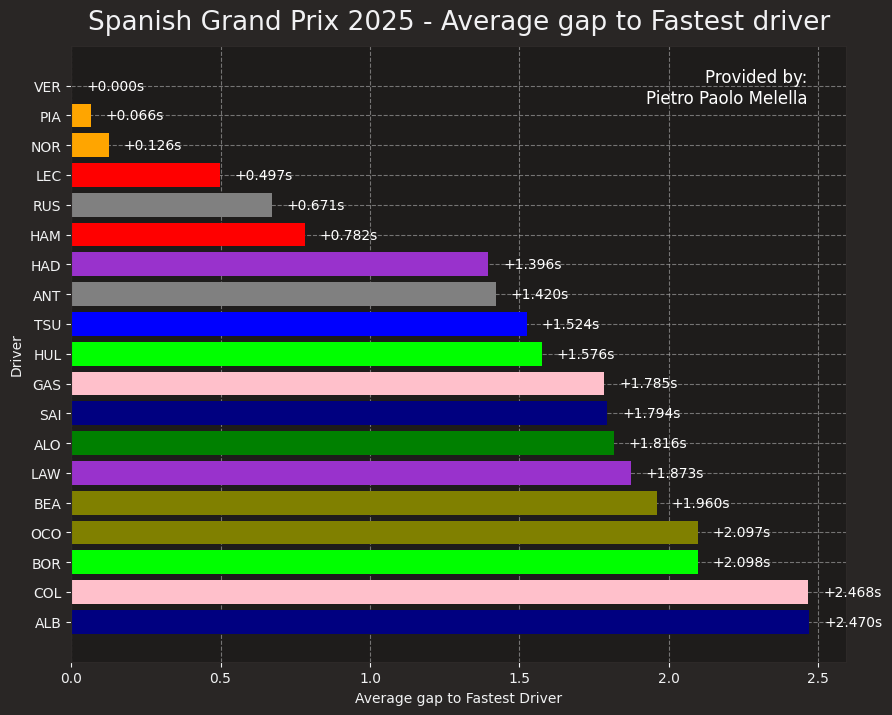

In [12]:
mean_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top
plt.show()

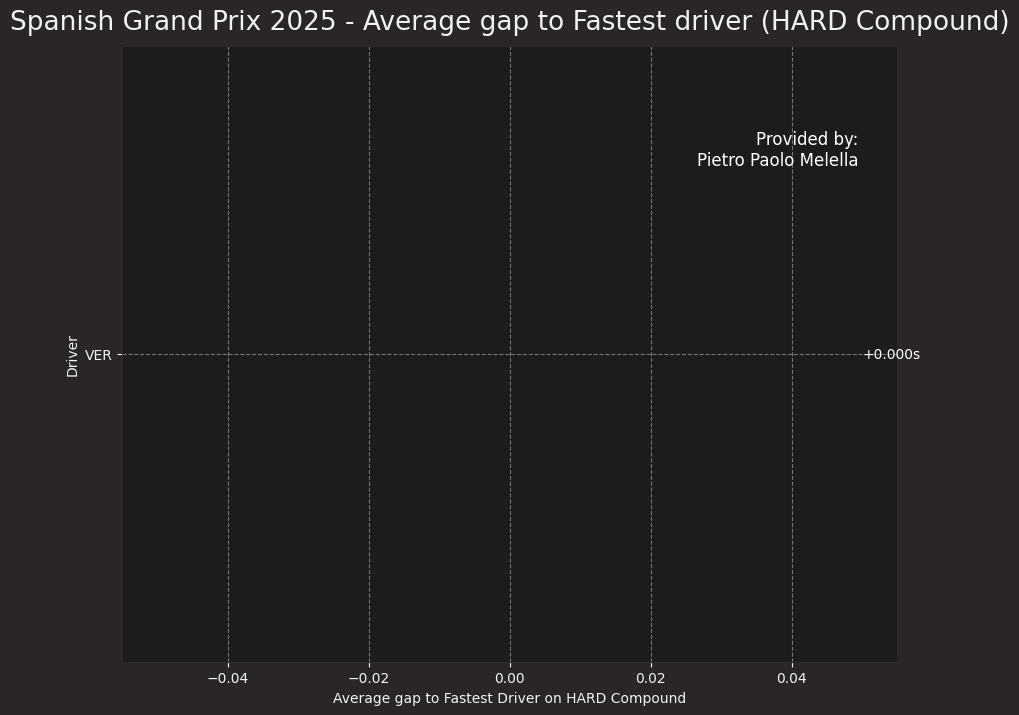

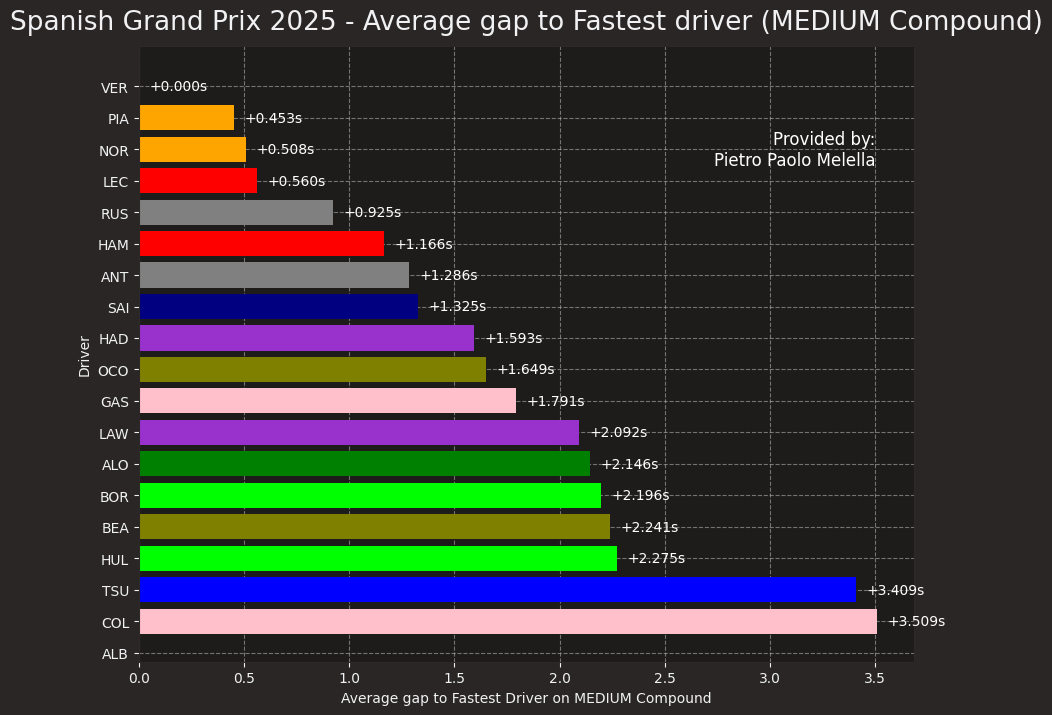

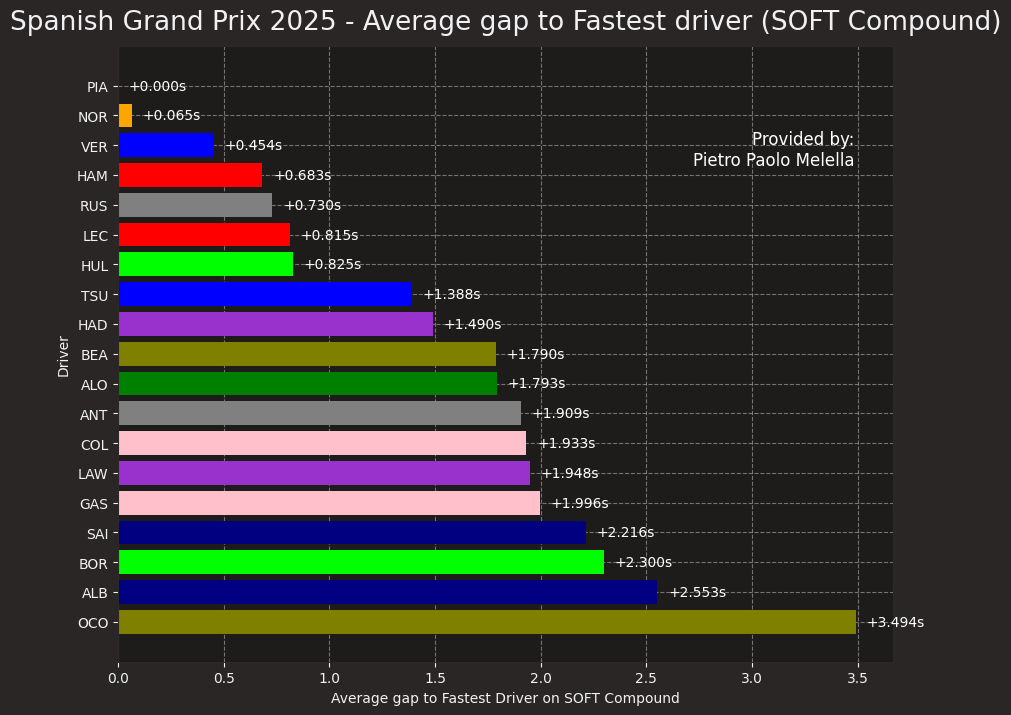

In [13]:
# Calculate mean lap times for each compound
mean_lap_times_per_compound = transformed_laps.groupby(['Driver', 'Compound'])['LapTime (s)'].mean().unstack()

# Iterate over each compound and create a separate plot
for compound in mean_lap_times_per_compound.columns:
    # Replace NaN values with a large number (indicating no lap times for that compound)
    mean_lap_times_per_compound[compound] = mean_lap_times_per_compound[compound].fillna(np.inf)

    # Find the fastest lap time for this compound (ignoring inf values)
    fastest_lap_time_compound = mean_lap_times_per_compound[compound][mean_lap_times_per_compound[compound] != np.inf].min()

    # Compute the gap from the fastest lap time for each driver (for this compound)
    gap_from_fastest_compound = mean_lap_times_per_compound[compound] - fastest_lap_time_compound

    # Sort the gaps for better visualization (fastest to slowest)
    gap_from_fastest_compound = gap_from_fastest_compound.sort_values(ascending=True)

    # Plot the data for this compound
    plt.figure(figsize=(10, 8))
    bars = plt.barh(gap_from_fastest_compound.index, gap_from_fastest_compound.values,
                    color=[colors[driver] for driver in gap_from_fastest_compound.index])
    plt.xlabel(f"Average gap to Fastest Driver on {compound} Compound")
    plt.ylabel("Driver")
    plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver ({compound} Compound)")

    plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

    # Add mean lap times as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        if np.isfinite(width):  # Ensure we only try to plot finite values
            plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
                     va='center', ha='left', color='white', fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().invert_yaxis()  # To display the fastest on top
    plt.show()

### 📊 Lap Time Consistency (Standard Deviation)

This analysis focuses on **consistency** by calculating the standard deviation of lap times for each driver.  
A lower standard deviation indicates smoother, more predictable performance — critical in race conditions for tyre management and strategy.  
Drivers with small variation often execute stints more efficiently, even if they aren’t the absolute fastest.

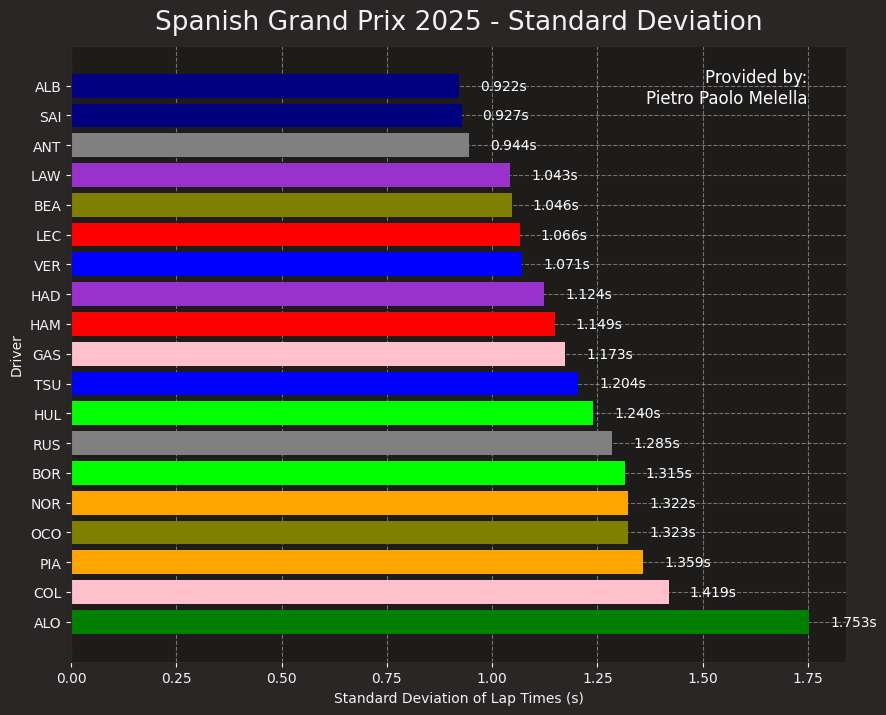

In [14]:
# Calculate the standard deviation of lap times for each driver
std_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].std()

# Sort the standard deviation values for better visualization (lowest to highest)
std_lap_times_sorted = std_lap_times.sort_values(ascending=True)

# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(std_lap_times_sorted.index, std_lap_times_sorted.values, 
                color=[colors[driver] for driver in std_lap_times_sorted.index])
plt.xlabel("Standard Deviation of Lap Times (s)")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Standard Deviation")

# Add standard deviation values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the most consistent drivers on top
plt.show()

In [15]:
transformed_laps.pick_drivers('LEC')

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s)
209,0 days 01:02:01.344000,LEC,16,0 days 00:01:21.421000,2.0,1.0,NaT,NaT,0 days 00:00:24.415000,0 days 00:00:32.960000,...,Ferrari,0 days 01:00:39.923000,2025-06-01 13:04:44.121,1,5.0,False,,False,True,81.421
210,0 days 01:03:22.153000,LEC,16,0 days 00:01:20.809000,3.0,1.0,NaT,NaT,0 days 00:00:24.264000,0 days 00:00:32.473000,...,Ferrari,0 days 01:02:01.344000,2025-06-01 13:06:05.542,1,5.0,False,,False,True,80.809
211,0 days 01:04:42.878000,LEC,16,0 days 00:01:20.725000,4.0,1.0,NaT,NaT,0 days 00:00:23.886000,0 days 00:00:32.381000,...,Ferrari,0 days 01:03:22.153000,2025-06-01 13:07:26.351,1,5.0,False,,False,True,80.725
212,0 days 01:06:03.628000,LEC,16,0 days 00:01:20.750000,5.0,1.0,NaT,NaT,0 days 00:00:23.909000,0 days 00:00:32.475000,...,Ferrari,0 days 01:04:42.878000,2025-06-01 13:08:47.076,1,5.0,False,,False,True,80.750
213,0 days 01:07:24.996000,LEC,16,0 days 00:01:21.368000,6.0,1.0,NaT,NaT,0 days 00:00:23.784000,0 days 00:00:32.764000,...,Ferrari,0 days 01:06:03.628000,2025-06-01 13:10:07.826,1,5.0,False,,False,True,81.368
214,0 days 01:08:46.718000,LEC,16,0 days 00:01:21.722000,7.0,1.0,NaT,NaT,0 days 00:00:24.036000,0 days 00:00:33.025000,...,Ferrari,0 days 01:07:24.996000,2025-06-01 13:11:29.194,1,5.0,False,,False,True,81.722
215,0 days 01:10:08.559000,LEC,16,0 days 00:01:21.841000,8.0,1.0,NaT,NaT,0 days 00:00:23.946000,0 days 00:00:33.269000,...,Ferrari,0 days 01:08:46.718000,2025-06-01 13:12:50.916,1,5.0,False,,False,True,81.841
216,0 days 01:11:30.686000,LEC,16,0 days 00:01:22.127000,9.0,1.0,NaT,NaT,0 days 00:00:24.302000,0 days 00:00:33.121000,...,Ferrari,0 days 01:10:08.559000,2025-06-01 13:14:12.757,1,5.0,False,,False,True,82.127
217,0 days 01:12:51.714000,LEC,16,0 days 00:01:21.028000,10.0,1.0,NaT,NaT,0 days 00:00:23.929000,0 days 00:00:32.569000,...,Ferrari,0 days 01:11:30.686000,2025-06-01 13:15:34.884,1,4.0,False,,False,True,81.028
218,0 days 01:14:12.718000,LEC,16,0 days 00:01:21.004000,11.0,1.0,NaT,NaT,0 days 00:00:23.860000,0 days 00:00:32.687000,...,Ferrari,0 days 01:12:51.714000,2025-06-01 13:16:55.912,1,4.0,False,,False,True,81.004


In [16]:
# Replace these with your actual telemetry-framework imports:
# from telemetry import transformed_laps, circuit_info, interpolate_dataframe, session

import warnings

# ignore only the FastF1 deprecation warning about delta_time
warnings.filterwarnings(
    "ignore",
    message="`utils.delta_time` is considered deprecated.*",
    category=FutureWarning
)

class FastestLap:
    """
    Wraps a fastest-lap record and provides convenience accessors.
    Expects lap to have ['Driver','Sector1Time','Sector2Time'] and get_car_data().
    """
    def __init__(self, lap):
        self.name = lap['Driver']
        self.s1_time = lap['Sector1Time']
        self.s2_time = lap['Sector2Time']
        df = lap.get_car_data().add_distance()
        self.df = interpolate_dataframe(df)

    @property
    def sector_distances(self):
        d1 = self.df[self.df['Time'] <= self.s1_time]['Distance'].max()
        d2 = self.df[self.df['Time'] <= (self.s1_time + self.s2_time)]['Distance'].max()
        return d1, d2

def compute_acceleration(df):
    """
    Add longitudinal acceleration to telemetry DataFrame.
    Expects:
      - df['Speed'] in km/h
      - df['SessionTime'] as pandas Timedelta
    Returns df copy with new columns:
      - 'Speed_ms': speed in m/s
      - 'Sess_s'  : session time in seconds
      - 'Acc'     : longitudinal acceleration in m/s²
    """
    df = df.copy()
    df['Speed_ms'] = df['Speed'] / 3.6
    df['Sess_s']   = df['SessionTime'].dt.total_seconds()
    df['Acc']      = np.gradient(df['Speed_ms'], df['Sess_s'])
    return df

def compare_laps(drivers, channels=None, session_label="", driver_color_map=None):
    """
    Compare up to three drivers' fastest laps in a Jupyter notebook, including acceleration and delta-time.
    :param drivers: list of 1-3 driver codes, e.g. ['LEC', 'NOR', 'VER']
    :param channels: list of telemetry columns to plot
    :param session_label: optional session indicator (e.g. 'FP1')
    :param driver_color_map: dict mapping driver codes to matplotlib-compatible colors
    """
    if not (1 <= len(drivers) <= 4):
        raise ValueError("drivers list must contain 1 to 3 items")

    # Default channels
    default_channels = ['Speed', 'Throttle', 'Brake', 'RPM', 'nGear', 'DRS']
    channels = channels or default_channels

    units = {
        'Speed': 'km/h', 'Throttle': '%', 'Brake': '%', 'RPM': 'rpm',
        'nGear': '', 'DRS': ''
    }

    # Load fastest laps and compute acceleration
    laps = []          # FastestLap wrappers
    lap_objs = []      # raw FastF1 Lap objects
    for d in drivers:
        lap_obj = transformed_laps.pick_drivers(d).pick_fastest()
        fl = FastestLap(lap_obj)
        fl.df = compute_acceleration(fl.df)
        laps.append(fl)
        lap_objs.append(lap_obj)

    # Compute total lap times
    lap_times = [
    lap_obj['LapTime'].total_seconds()
    for lap_obj in lap_objs
    ]
    # Benchmark = fastest lap
    baseline_idx = lap_times.index(min(lap_times))
    baseline_name = drivers[baseline_idx]

    # Sector split distances and corner markers
    s1_dist, s2_dist = laps[baseline_idx].sector_distances
    corner_distances = circuit_info.corners['Distance'].values

    # Color palette
    default_palette = ['red', 'orange', 'grey', 'blue']
    palette = []
    for i, d in enumerate(drivers):
        if driver_color_map and d in driver_color_map:
            palette.append(driver_color_map[d])
        else:
            palette.append(default_palette[i])

    # Determine subplots: channels + Acc + (Δ-time if >1 driver)
    n_plots = len(channels) + 1 + (1 if len(drivers) > 1 else 0)
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 3.5 * n_plots), sharex=True)
    if n_plots == 1:
        axes = [axes]
    plt.style.use('dark_background')

    # Plot telemetry channels
    for i, ch in enumerate(channels):
        ax = axes[i]
        if ch not in laps[baseline_idx].df.columns:
            ax.set_visible(False)
            continue
        for lap, col in zip(laps, palette):
            ax.plot(lap.df['Distance'], lap.df[ch], color=col,
                    linestyle='-', label=f"{lap.name} {ch}")
        ax.set_ylabel(f"{ch} ({units[ch]})", color='white')
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.tick_params(colors='white')
        ax.axvline(s1_dist, color='white', linestyle='--')
        ax.axvline(s2_dist, color='white', linestyle='--')
        for num, d in enumerate(corner_distances, start=1):
            ax.text(d, ax.get_ylim()[0], str(num), color='white', fontsize=8,
                    ha='center', va='bottom')

    # Plot acceleration
    ax_acc = axes[len(channels)]
    for lap, col in zip(laps, palette):
        ax_acc.plot(lap.df['Distance'], lap.df['Acc'], color=col,
                    linestyle='-', label=f"{lap.name} Acc")
    ax_acc.set_ylabel('Acc (m/s²)', color='white')
    ax_acc.legend(loc='upper right')
    ax_acc.grid(True, linestyle='--', linewidth=0.5)
    ax_acc.tick_params(colors='white')

    # Plot Δ-time using FastF1 utility
    if len(drivers) > 1:
        ax_dt = axes[-1]
        ref_lap = lap_objs[baseline_idx]
        # For each comparison lap
        for idx, comp_lap in enumerate(lap_objs):
            if idx == baseline_idx:
                continue
            # delta_time returns (Series, ref_tel_df, comp_tel_df)
            delta_series, ref_tel, comp_tel = delta_time(ref_lap, comp_lap)
            ax_dt.plot(ref_tel['Distance'], delta_series,
                       color=palette[idx], linestyle='-',
                       label=f"Δ ({drivers[idx]} - {baseline_name})")
        ax_dt.set_ylabel('Δ Time (s)', color='white')
        ax_dt.axhline(0, color='white', linestyle='--')
        ax_dt.grid(True, linestyle='--', linewidth=0.5)
        ax_dt.tick_params(colors='white')
        ax_dt.set_xlabel('Distance (m)', color='white')
        ax_dt.xaxis.set_major_locator(plt.MultipleLocator(500))
        ax_dt.xaxis.set_minor_locator(plt.MultipleLocator(100))
        ax_dt.legend(loc='upper right', title=f"Benchmark: {baseline_name}")

    # Annotate lap times
    labels = []
    for name, secs in zip(drivers, lap_times):
        mins = int(secs // 60)
        rem = secs - mins * 60
        labels.append(f"{name}: {mins}:{rem:06.3f}")
    fig.text(0.02, 0.98, "\n".join(labels), ha='left', va='top',
             color='white', fontsize=10,
             bbox=dict(facecolor='black', alpha=0.5, pad=4))

    # Signature and title
    fig.text(0.9, 0.96, "Provided by: Pietro Paolo Melella",
             ha='right', va='bottom', color='white', fontsize=15)
    title = (f"{session.event['EventName']} {session.event.year} {session_label}" 
             if session_label else f"{session.event['EventName']} {session.event.year}")
    fig.suptitle(title, color='white')
    fig.subplots_adjust(top=0.92)
    plt.tight_layout(rect=[0, 0, 0.90, 0.97])
    plt.show()

In [17]:
# note: we assume you already have `circuit_info`, `session`, and `delta_time` imported above

class ManualLapComparison:
    """
    Standalone class to compare any 1–4 laps you choose, without touching your existing code.
    Usage:
        comp = ManualLapComparison(
            laps=[lap1, lap2],
            labels=['Run A','Run B'],
            channels=['Speed','Brake'],
            session_label='FP2',
            color_map={'Run B':'cyan'}
        )
        comp.plot()
    """
    def __init__(self, laps, labels=None, channels=None, session_label="", color_map=None):
        n = len(laps)
        if not (1 <= n <= 4):
            raise ValueError("Provide between 1 and 4 Lap objects")
        self.lap_objs = laps
        self.labels = labels or [lap['Driver'] for lap in laps]
        if len(self.labels) != n:
            raise ValueError("`labels` length must match laps length")
        self.channels = ['Speed','Throttle','Brake','RPM','nGear']
        self.session_label = session_label
        self.color_map = color_map or {}
        self.units = {'Speed':'km/h','Throttle':'%','Brake':'%','RPM':'rpm','nGear':'','DRS':''}

        self._prepare()
        self._pick_baseline()

    def _prepare(self):
        self.data = []
        for lap, lbl in zip(self.lap_objs, self.labels):
            # get & interpolate telemetry + add distance
            df = lap.get_car_data().add_distance()
            df = interpolate_dataframe(df)
            # compute accel (reuse your compute_acceleration)
            df = compute_acceleration(df)


            # sector distances
            s1, s2 = lap['Sector1Time'], lap['Sector2Time']
            d1 = df[df['Time'] <= s1]['Distance'].max()
            d2 = df[df['Time'] <= (s1 + s2)]['Distance'].max()

            self.data.append({
                'lap': lap,
                'df': df,
                'label': lbl,
                'time_s': lap['LapTime'].total_seconds(),
                'sectors': (d1, d2)
            })

    def _pick_baseline(self):
        times = [d['time_s'] for d in self.data]
        self.base_idx = times.index(min(times))
        self.base_label = self.data[self.base_idx]['label']

    def plot(self):
        n = len(self.data)
        palette = ['white','red','grey','blue']
        colors = [
            self.color_map.get(d['label'], palette[i])
            for i, d in enumerate(self.data)
        ]

        # sector & corner markers
        s1_dist, s2_dist = self.data[self.base_idx]['sectors']
        corners = circuit_info.corners['Distance'].values

        # build subplots
        n_plots = len(self.channels) + 1 + (1 if n > 1 else 0)
        fig, ax = plt.subplots(n_plots, 1, figsize=(14, 3.5*n_plots), sharex=True)
        axes = ax if isinstance(ax, (list, np.ndarray)) else [ax]
        plt.style.use('dark_background')

        # telemetry channels
        for i, ch in enumerate(self.channels):
            a = axes[i]
            if ch not in self.data[0]['df'].columns:
                a.set_visible(False); continue
            for d, col in zip(self.data, colors):
                a.plot(d['df']['Distance'], d['df'][ch], color=col, label=f"{d['label']} {ch}")
            a.set_ylabel(f"{ch} ({self.units.get(ch,'')})", color='white')
            a.grid(True, linestyle='--', linewidth=0.5)
            a.tick_params(colors='white')
            a.axvline(s1_dist, color='white', linestyle='--')
            a.axvline(s2_dist, color='white', linestyle='--')
            for idx, cd in enumerate(corners, start=1):
                a.text(cd, a.get_ylim()[0], str(idx),
                       color='white', fontsize=8, ha='center', va='bottom')
            a.legend(loc='upper right')

        # acceleration
        a_acc = axes[len(self.channels)]
        for d, col in zip(self.data, colors):
            a_acc.plot(d['df']['Distance'], d['df']['Acc'], color=col, label=f"{d['label']} Acc")
        a_acc.set_ylabel('Acc (m/s²)', color='white')
        a_acc.grid(True, linestyle='--', linewidth=0.5)
        a_acc.tick_params(colors='white')
        a_acc.legend(loc='upper right')

        # Δ-time
        if n > 1:
            a_dt = axes[-1]
            ref = self.lap_objs[self.base_idx]
            for idx, comp in enumerate(self.lap_objs):
                if idx == self.base_idx: continue
                ds, ref_tel, cmp_tel = delta_time(ref, comp)
                a_dt.plot(ref_tel['Distance'], ds, color=colors[idx],
                          label=f"Δ ({self.labels[idx]} - {self.base_label})")
            a_dt.set_ylabel('Δ Time (s)', color='white')
            a_dt.axhline(0, color='white', linestyle='--')
            a_dt.grid(True, linestyle='--', linewidth=0.5)
            a_dt.tick_params(colors='white')
            a_dt.set_xlabel('Distance (m)', color='white')
            a_dt.xaxis.set_major_locator(plt.MultipleLocator(500))
            a_dt.xaxis.set_minor_locator(plt.MultipleLocator(100))
            a_dt.legend(loc='upper right', title=f"Benchmark: {self.base_label}")

        # annotate lap times
        txt = "\n".join(
            f"{d['label']}: {int(d['time_s']//60)}:{(d['time_s']%60):06.3f}"
            for d in self.data
        )
        fig.text(0.02, 0.98, txt, ha='left', va='top', color='white',
                 fontsize=10, bbox=dict(facecolor='black', alpha=0.5, pad=4))

        # signature & title
        fig.text(0.9, 0.96, "Provided by: Pietro Paolo Melella",
                 ha='right', va='bottom', color='white', fontsize=15)
        title = (f"{session.event['EventName']} {session.event.year} {self.session_label}"
                 if self.session_label else
                 f"{session.event['EventName']} {session.event.year}")
        fig.suptitle(title, color='white')
        fig.subplots_adjust(top=0.92)
        plt.tight_layout(rect=[0,0,0.90,0.97])
        plt.show()

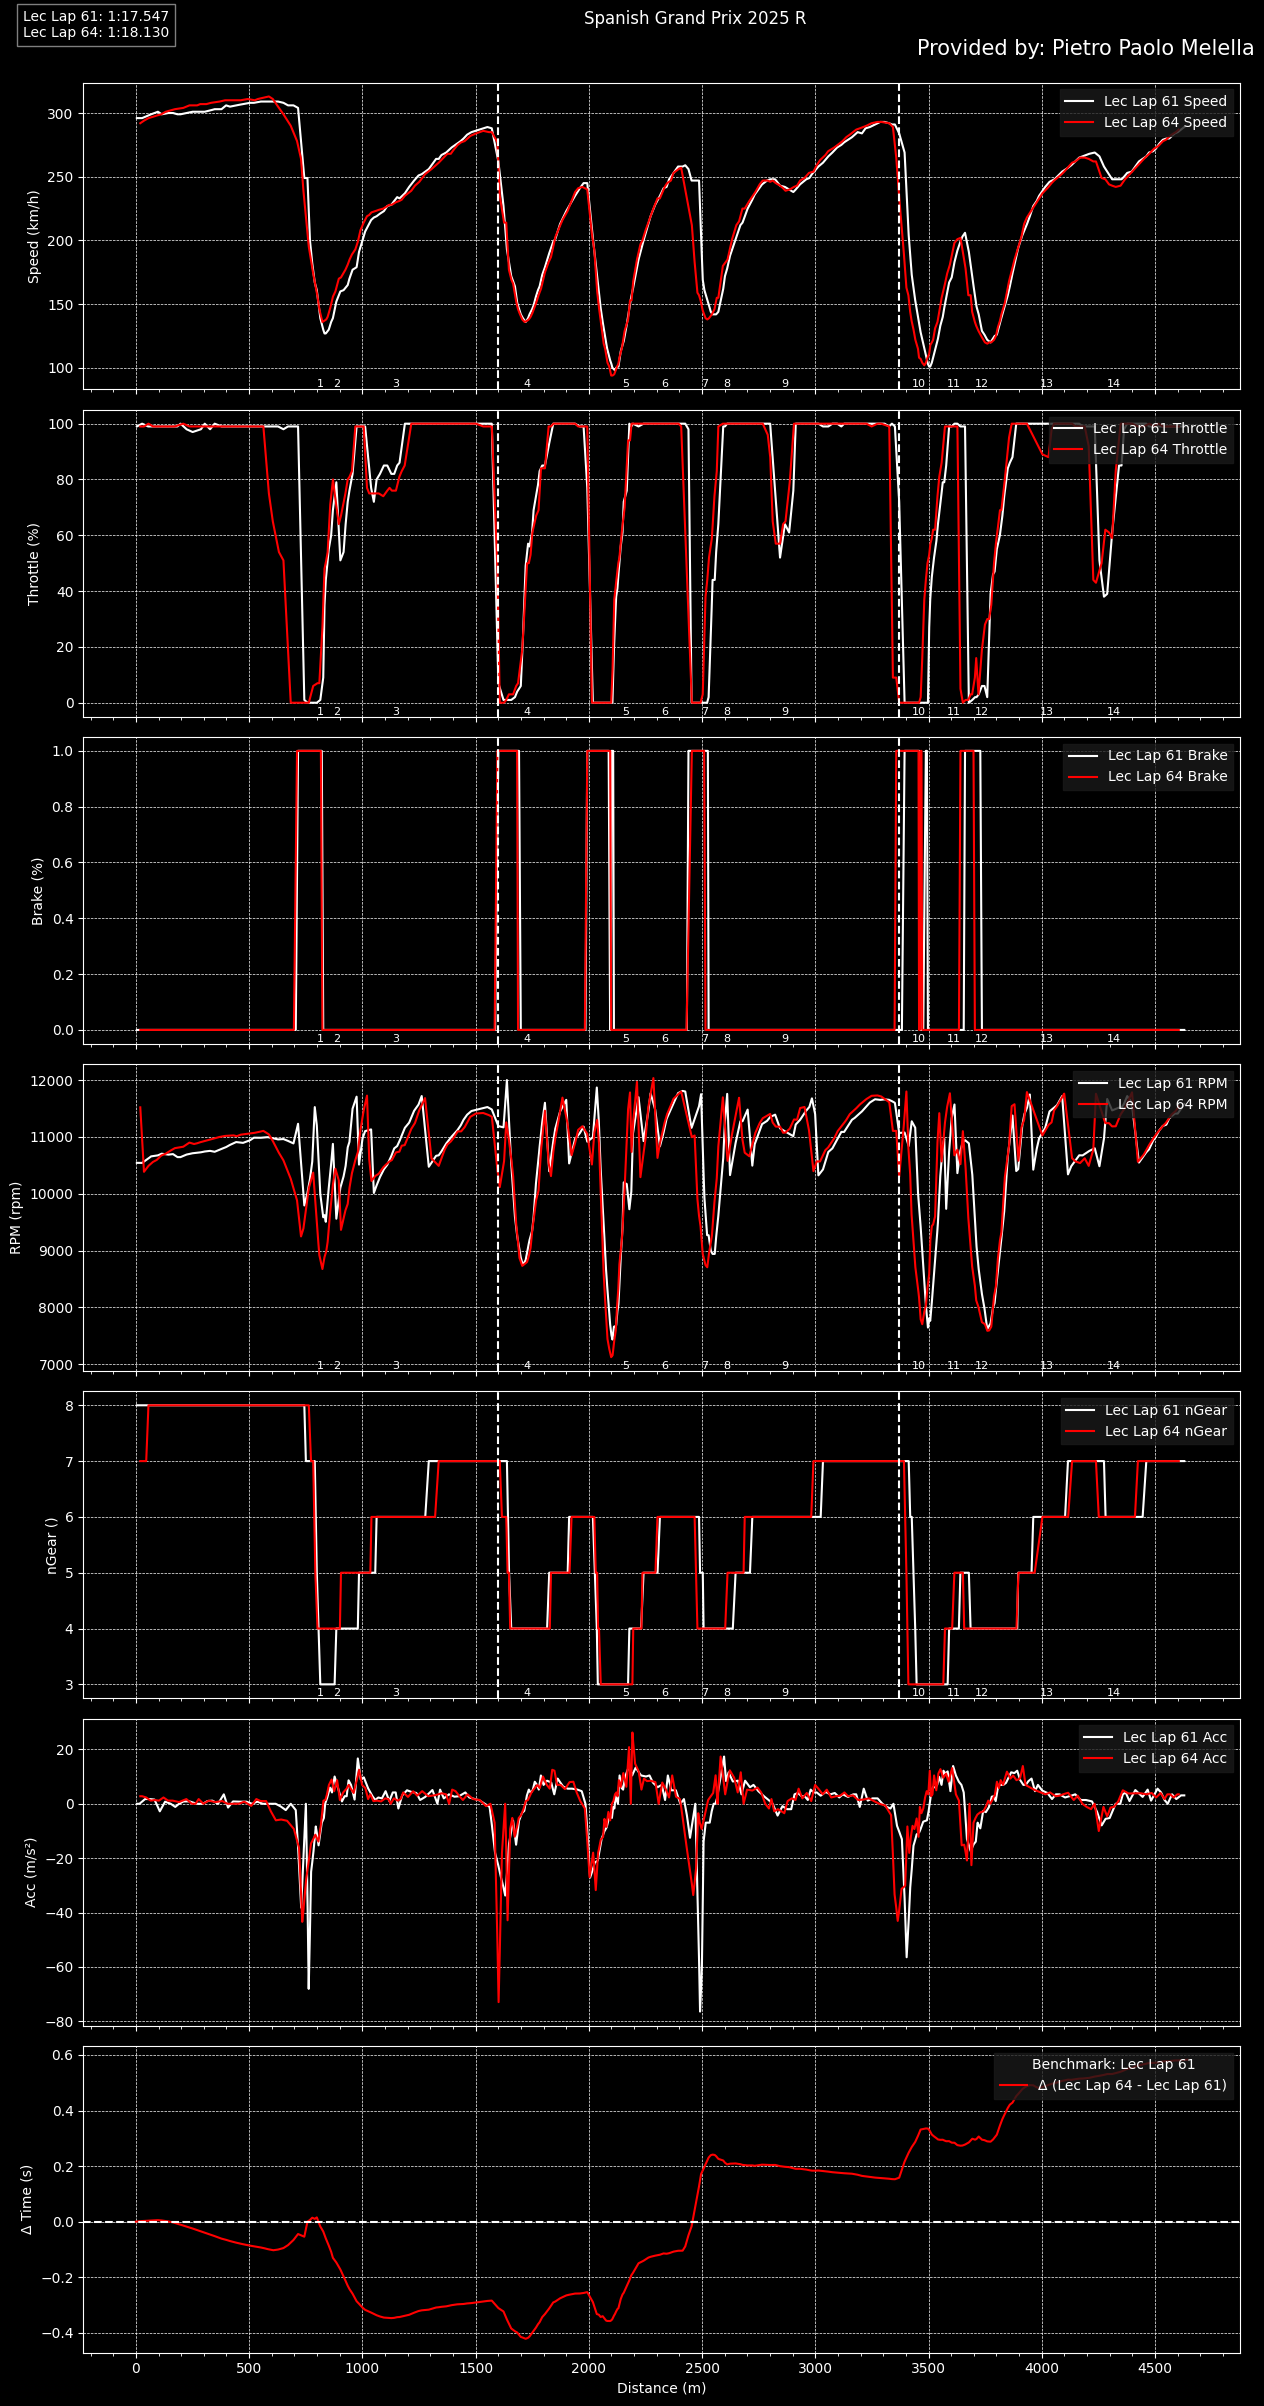

In [29]:
lap1 = transformed_laps.pick_drivers('LEC').pick_laps(61).iloc[0]
lap2 = transformed_laps.pick_drivers('LEC').pick_laps(64).iloc[0]

comp = ManualLapComparison(
    laps=[lap1, lap2],
    labels=['Lec Lap 61','Lec Lap 64'],
    channels=['Speed','Throttle','RPM'],
    session_label='R',
    color_map=''
)
comp.plot()